In [192]:
import warnings
warnings.filterwarnings('ignore')

In [193]:
import numpy as np
import pandas as pd
import seaborn as sns

In [194]:
df = pd.read_csv('legacy_cost_computation/table-cost-popup_new.csv')
df = df[df.columns[1:]]

In [195]:
df.columns

Index(['finess', 'mois', 'annee', 'sexe', 'ghm2', 'GHS', 'age', 'duree',
       'supp_rea', 'supp_si', 'supp_stf', 'supp_src', 'supp_nn1', 'supp_nn2',
       'supp_nn3', 'supp_rep', 'ano_date', 'anonyme', 'nbActe', 'nbRum',
       'modeEntree', 'modeSortie', 'cmu', 'motif', 'dp', 'dr', 'cost'],
      dtype='object')

In [196]:
df.head()

,finess,mois,annee,sexe,ghm2,GHS,age,duree,supp_rea,supp_si,...,anonyme,nbActe,nbRum,modeEntree,modeSortie,cmu,motif,dp,dr,cost
0,590781415,8,2012,1,05M13T,1815,53,0,0,0,...,GZ90EST3Q2Q7JB1HE,3,1,8,8,1.0,NaN,R073,NaN,784.317704
1,590781415,9,2012,2,04M031,1134,40,6,0,0,...,5SCE0HJ2519YXK4QE,17,1,8,8,1.0,NaN,J980,NaN,2628.365881
2,590781415,10,2012,1,06M18Z,2189,4,3,0,0,...,5P5A5R6ZNC3WFMDYE,18,1,8,8,1.0,NaN,R11,NaN,1604.279778
3,590781415,2,2012,1,03K021,0815,8,1,0,0,...,NWZ9RQ8S9PX7CFCHE,3,1,8,8,1.0,NaN,K028,NaN,1397.940920
4,590781415,9,2012,1,08C441,2866,5,1,0,0,...,RW52Q7WGAYX6PYUAE,10,1,8,8,1.0,NaN,S6261,NaN,1451.410263


In [197]:
def hosp_type(duree):
    if duree == 0:
        return 'Hopital de jour'
    else:
        return "Sejour de plus d'une journée"

In [198]:
def generate_placement_reason(cmu,motif):
    if cmu==1:
        return 'CMU'
    elif motif == 1:
        return 'AME'
    elif motif == 4:
        return 'SUV'
    else:
        return 'Autre'

In [199]:
def generate_severiy(ghm2):
    try:
        if int(ghm2[-1]):
            return ghm2[-1]
    except:
        return 'Pas de niveau de sévérité'

In [200]:
def generate_ghm_root(ghm2):
    return ghm2[:-1]

In [201]:
def generate_cmd(ghm2):
    return ghm2[:2]

In [202]:
df['raison'] = df[['cmu','motif']].apply(lambda x: generate_placement_reason(x.cmu,x.motif),axis=1)

In [203]:
df['hp_type'] = df['duree'].apply(hosp_type)

In [204]:
df['severity'] = df['ghm2'].apply(generate_severiy)

In [205]:
df['ghm_racine'] = df['ghm2'].apply(generate_ghm_root)

In [206]:
df['cmd'] = df['ghm2'].apply(generate_cmd)

In [207]:
df = df[df['raison']!='Autre']

In [208]:
df['anonyme'].nunique()

3660054

In [209]:
df.head()

,finess,mois,annee,sexe,ghm2,GHS,age,duree,supp_rea,supp_si,...,cmu,motif,dp,dr,cost,raison,hp_type,severity,ghm_racine,cmd
0,590781415,8,2012,1,05M13T,1815,53,0,0,0,...,1.0,NaN,R073,NaN,784.317704,CMU,Hopital de jour,Pas de niveau de sévérité,05M13,05
1,590781415,9,2012,2,04M031,1134,40,6,0,0,...,1.0,NaN,J980,NaN,2628.365881,CMU,Sejour de plus d'une journée,1,04M03,04
2,590781415,10,2012,1,06M18Z,2189,4,3,0,0,...,1.0,NaN,R11,NaN,1604.279778,CMU,Sejour de plus d'une journée,Pas de niveau de sévérité,06M18,06
3,590781415,2,2012,1,03K021,0815,8,1,0,0,...,1.0,NaN,K028,NaN,1397.940920,CMU,Sejour de plus d'une journée,1,03K02,03
4,590781415,9,2012,1,08C441,2866,5,1,0,0,...,1.0,NaN,S6261,NaN,1451.410263,CMU,Sejour de plus d'une journée,1,08C44,08


In [210]:
len(df)

8672825

# Univariate Analysis - Patients

###### codage 20 : problème de répartition des données sur la corse ( choix corse ou haute corse)

### Geo Repartition

#### departement

In [211]:
def finess_departement_extractor(fin_id):
    fin_id = str(fin_id)
    if fin_id[:2] == '98':
        return '976' #mayotte
    elif fin_id[:2] == '97':
        return fin_id[:2] +  fin_id[3]
    else: 
        return fin_id[:2]  

In [212]:
df['departement'] = df['finess'].apply(finess_departement_extractor)

#### region

In [213]:
df_reg = pd.read_csv('analysis_ressources/dep_regions.csv',names=['id_dep','dep_label','region_label'],header=None)

In [214]:
df['departement'].unique()

array(['59', '10', '20', '30', '40', '50', '60', '61', '70', '80', '90',
       '62', '11', '12', '13', '63', '64', '65', '66', '67', '68', '14',
       '15', '16', '69', '17', '18', '19', '21', '22', '71', '23', '24',
       '25', '26', '27', '28', '72', '73', '74', '29', '2A', '2B', '75',
       '31', '32', '33', '34', '35', '36', '37', '38', '76', '39', '41',
       '77', '78', '42', '43', '44', '79', '81', '45', '46', '82', '83',
       '84', '85', '47', '48', '49', '51', '86', '87', '88', '52', '53',
       '54', '89', '91', '92', '93', '55', '56', '94', '95', '57', '58',
       '971', '972', '973', '974', '976'], dtype=object)

In [215]:
df_reg

,id_dep,dep_label,region_label
0,01,Ain,Auvergne-Rhône-Alpes
1,02,Aisne,Hauts-de-France
2,03,Allier,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,Provence-Alpes-Côte d'Azur
...,...,...,...
96,971,Guadeloupe,Guadeloupe
97,972,Martinique,Martinique
98,973,Guyane,Guyane
99,974,La Réunion,La Réunion


In [216]:
df = pd.merge(df,df_reg[['id_dep','region_label']],how='inner',left_on='departement',right_on='id_dep')

#### CMU

![title](evo_repart_geo_CMU_patient.png)

#### SUV

![SUV](evo_repart_geo_SUV_patient.png)

#### AME

![title](evo_repart_geo_AME_patient.png)

## Groupes Homogènes de Malades (GHM) 

In [217]:
def rename_unnamed(df, label=''):
    for i, cols in enumerate(df.columns.levels):
        cols = cols.tolist()
        for k, col in enumerate(cols):
            if 'Unnamed' in col:
                cols[k] = ' '*k
        df.columns.set_levels(cols,level=i,inplace=True)

In [218]:
enc_mco = pd.read_excel("analysis_ressources/ENC_MCO/ENC_MCO_2018.xlsx",
                       header=[0,1],
                       index_col=[0,1])
enc_mco.columns = enc_mco.columns.droplevel()

In [219]:
enc_mco_racine = enc_mco[enc_mco['GHM V2020'] == 'TOTAL']
enc_mco_racine = enc_mco_racine[['racine','Libellé GHM']]
enc_mco_racine.columns = ['racine','Libellé GHM Racine']

In [220]:
df = pd.merge(df,enc_mco[['GHM V2020','Libellé GHM']],how='inner',left_on='ghm2',right_on='GHM V2020')

In [221]:
df = pd.merge(df,enc_mco_racine,how='inner',left_on='ghm_racine',right_on='racine')

In [222]:
df.drop(['GHM V2020'],axis=1,inplace=True)

In [223]:
len(df)

8546044

In [224]:
cmd_labels = pd.read_csv('analysis_ressources/cmd_label.csv',sep='\t')
cmd_labels['id_cmd'] = cmd_labels['id_cmd'].apply(lambda x: f"0{x}" if x<10 else x)
cmd_labels['id_cmd'] = cmd_labels['id_cmd'].astype(str)

In [225]:
cmd_labels

,id_cmd,label_cmd
0,01,Affections du système nerveux
1,02,Affections de l'œil
2,03,"Affections des oreilles, du nez, de la gorge, ..."
3,04,Affections de l'appareil respiratoire
4,05,Affections de l'appareil circulatoire
5,06,Affections du tube digestif
6,07,Affections du système hépatobiliaire et du pan...
7,08,Affections et traumatismes de l'appareil muscu...
8,09,"Affections de la peau, des tissus sous-cutanés..."
9,10,"Affections endocriniennes, métaboliques et nut..."


In [226]:
df = pd.merge(df,cmd_labels,how='inner',left_on='cmd',right_on='id_cmd')

In [227]:
df.drop(['id_cmd'],axis=1,inplace=True)

In [228]:
len(df)

8546044

In [229]:
df['dp'].apply(lambda x: len(x)).mean()

4.127801354638474

In [230]:
def contract_cim_code(code):
    return code.replace(' ','')

In [231]:
cim_labels = pd.read_csv('analysis_ressources/NomenclatureCim10/LIBCIM10MULTI.TXT',sep='|',
                         names=['code','type_mco_had','profil_ssr','type_psy','lib_court','lib_dp'],
                        encoding='ANSI')
cim_labels['code'] = cim_labels['code'].apply(contract_cim_code)

In [232]:
cim_labels['code'].apply(lambda x:len(x)).mean()

4.6917175768316

In [233]:
cim_labels

,code,type_mco_had,profil_ssr,type_psy,lib_court,lib_dp
0,A00,3,NNNN,3,CHOLERA,Choléra
1,A000,0,NOOO,0,"CHOLERA A VIBRIO CHOLERAE 01, BIOVAR CHOLERAE","Choléra à Vibrio cholerae 01, biovar cholerae"
2,A001,0,NOOO,0,"CHOLERA A VIBRIO CHOLERAE 01, BIOVAR EL TOR","Choléra à Vibrio cholerae 01, biovar El Tor"
3,A009,0,NOOO,0,"CHOLERA, SAI","Choléra, sans précision"
4,A01,3,NNNN,3,FIEVRES TYPHOIDE ET PARATYPHOIDE,Fièvres typhoïde et paratyphoïde
...,...,...,...,...,...,...
42881,Z992+8,0,NONO,0,"DEPENDANCE ENVERS UNE DIALYSE RENALE, NCA","Dépendance envers une dialyse rénale, autre"
42882,Z993,0,NONO,0,DEPENDANCE ENVERS UN FAUTEUIL ROULANT,Dépendance envers un fauteuil roulant
42883,Z994,0,NONO,0,DEPENDANCE ENVERS UN COEUR ARTIFICIEL,Dépendance envers un coeur artificiel
42884,Z998,0,NONO,0,DEPENDANCE ENVERS D'AUTRES MACHINES ET APP. AU...,Dépendance envers d'autres machines et apparei...


In [234]:
df = pd.merge(df,cim_labels[['code','lib_dp']],how='inner',left_on='dp',right_on='code')

In [235]:
df.drop(['code'],axis=1,inplace=True)

In [236]:
df.sample(10)

,finess,mois,annee,sexe,ghm2,GHS,age,duree,supp_rea,supp_si,...,ghm_racine,cmd,departement,id_dep,region_label,Libellé GHM,racine,Libellé GHM Racine,label_cmd,lib_dp
8017858,750712184,10,2016,2,14Z14A,5495,38,2,0,0,...,14Z14,14,75,75,Île-de-France,Accouchements uniques par voie basse chez une\...,14Z14,Accouchements uniques par voie basse chez une\...,"Grossesses pathologiques, accouchements et aff...",Accouchement (unique) spontané par présentatio...
3759297,590782215,8,2021,2,28Z04Z,9605,69,0,0,0,...,28Z04,28,59,59,Hauts-de-France,"Hémodialyse, en séances",28Z04,"Hémodialyse, en séances",Séances,Dialyse extra-corporelle
1658675,220000020,5,2013,2,06M021,2124,0,2,0,0,...,06M02,06,22,22,Bretagne,Autres gastroentérites et maladies diverses du...,06M02,Autres gastroentérites et maladies diverses du...,Affections du tube digestif,Entérite à rotavirus
6553721,60785011,2,2017,1,20Z041,7267,49,3,0,0,...,20Z04,20,60,60,Hauts-de-France,"Ethylisme avec dépendance, niveau 1",20Z04,Ethylisme avec dépendance,Troubles mentaux organiques liés à l'absorptio...,"Syndrome de sevrage de l'alcool, avec convulsions"
4344823,970408589,2,2020,1,12C061,4526,14,1,0,0,...,12C06,12,974,974,La Réunion,Interventions sur les testicules pour affectio...,12C06,Interventions sur les testicules pour affectio...,Affections de l'appareil génital masculin,Torsion du testicule
273719,750712184,8,2019,1,05K101,1702,63,2,0,0,...,05K10,05,75,75,Île-de-France,"Actes diagnostiques par voie vasculaire, niveau 1",05K10,Actes diagnostiques par voie vasculaire,Affections de l'appareil circulatoire,Myocardiopathie avec dilatation
5623721,330781196,5,2014,1,28Z15Z,9614,58,0,0,0,...,28Z15,28,33,33,Nouvelle-Aquitaine,"Oxygénothérapie hyperbare, en séances",28Z15,"Oxygénothérapie hyperbare, en séances",Séances,Séance d'oxygénothérapie hyperbare
4034675,780001236,10,2018,1,28Z04Z,9605,28,0,0,0,...,28Z04,28,78,78,Île-de-France,"Hémodialyse, en séances",28Z04,"Hémodialyse, en séances",Séances,Dialyse extra-corporelle
7146029,620101337,6,2019,2,23C021,7901,59,1,0,0,...,23C02,23,62,62,Hauts-de-France,Interventions chirurgicales avec autres motifs...,23C02,Interventions chirurgicales avec autres motifs...,Facteurs influant sur l'état de santé et autre...,Ajustement et entretien d'autres prothèses int...
5649180,30780100,9,2012,2,10M023,3913,43,4,0,0,...,10M02,10,30,30,Occitanie,"Diabète, âge supérieur à 35 ans, niveau 3",10M02,"Diabète, âge supérieur à 35 ans","Affections endocriniennes, métaboliques et nut...","Diabète sucré de type 1, avec complications mu..."


In [237]:
len(df)

8546044

In [238]:
def top_ghm_extract(df,column,k):
    df_agg =  df.groupby(['ghm2',column]).agg({'anonyme':'nunique'})
    df_agg = df_agg.reset_index()
    
    df_ = pd.DataFrame(None, columns=['ghm2',f"top{k}_{column}_patients"])
    
    for ghm2 in df_agg['ghm2'].unique():
        top = ' '.join(df_agg[df_agg['ghm2']==ghm2].sort_values(by='anonyme',ascending=False)[column][:k])
        df_ = df_.append({'ghm2':ghm2, f"top{k}_{column}_patients":top},ignore_index=True)
    return df_

In [ ]:
def top_ghm_extract(df,column,k,dispositif=None):
    df_agg =  df[df['raison']==dispositif].groupby(['ghm2',column]).agg({'anonyme':'nunique'})
    df_agg = df_agg.reset_index()
    
    df_ = pd.DataFrame(None, columns=['ghm2',f"top{k}_{column}_patients"])
    
    for ghm2 in df_agg['ghm2'].unique():
        top = ' '.join(df_agg[df_agg['ghm2']==ghm2].sort_values(by='anonyme',ascending=False)[column][:k])
        df_ = df_.append({'ghm2':ghm2, f"top{k}_{column}_patients":top},ignore_index=True)
    return df_

In [239]:
df = pd.merge(df,top_ghm_extract(df,'lib_dp',1),how='inner',left_on='ghm2',right_on='ghm2')

In [240]:
df = pd.merge(df,top_ghm_extract(df,'departement',3),how='inner',left_on='ghm2',right_on='ghm2')

In [241]:
df.sample(10)

,finess,mois,annee,sexe,ghm2,GHS,age,duree,supp_rea,supp_si,...,departement,id_dep,region_label,Libellé GHM,racine,Libellé GHM Racine,label_cmd,lib_dp,top1_lib_dp_patients,top3_departement_patients
5321089,970302121,4,2020,2,28Z04Z,9605,48,0,0,0,...,973,973,Guyane,"Hémodialyse, en séances",28Z04,"Hémodialyse, en séances",Séances,Dialyse extra-corporelle,Dialyse extra-corporelle,75 973 69
5405868,310781406,10,2015,1,11M171,4336,19,2,0,0,...,31,31,Occitanie,"Surveillances de greffes de rein, niveau 1",11M17,Surveillances de greffes de rein,Affections du rein et des voies urinaires,Greffe de rein,Greffe de rein,75 69 974
6243731,620103440,1,2019,2,28Z17Z,9616,54,0,0,0,...,62,62,Hauts-de-France,"Chimiothérapie pour affection non tumorale, en...",28Z17,"Chimiothérapie pour affection non tumorale, en...",Séances,Autres formes de chimiothérapie,Autres formes de chimiothérapie,75 59 13
3999179,340780477,8,2021,2,08M301,3129,41,2,0,0,...,34,34,Occitanie,"Rhumatismes et raideurs articulaires, niveau 1",08M30,Rhumatismes et raideurs articulaires,Affections et traumatismes de l'appareil muscu...,"Rhumatisme, sans précision - Sièges multiples",Fibromyalgie - Sièges multiples,13 34 75
2594927,590782637,8,2021,2,04M052,1143,55,5,0,0,...,59,59,Hauts-de-France,"Pneumonies et pleurésies banales, âge supérieu...",04M05,"Pneumonies et pleurésies banales, âge supérieu...",Affections de l'appareil respiratoire,"Pneumopathie lobaire, sans précision","Pneumopathie lobaire, sans précision",75 59 974
6312800,750712184,4,2019,1,28Z17Z,9616,18,0,0,0,...,75,75,Île-de-France,"Chimiothérapie pour affection non tumorale, en...",28Z17,"Chimiothérapie pour affection non tumorale, en...",Séances,Autres formes de chimiothérapie,Autres formes de chimiothérapie,75 59 13
5967784,750712184,7,2020,2,28Z07Z,9606,41,0,0,0,...,75,75,Île-de-France,"Chimiothérapie pour tumeur, en séances",28Z07,"Chimiothérapie pour tumeur, en séances",Séances,Séance de chimiothérapie pour tumeur,Séance de chimiothérapie pour tumeur,75 59 94
2468128,380780080,5,2021,2,04M18T,1240,0,2,0,0,...,38,38,Auvergne-Rhône-Alpes,"Bronchiolites, très courte durée",04M18,Bronchiolites,Affections de l'appareil respiratoire,"Bronchiolite (aiguë), sans précision","Bronchiolite (aiguë), sans précision",59 974 75
5217806,870000015,8,2021,1,28Z04Z,9605,46,0,0,0,...,87,87,Nouvelle-Aquitaine,"Hémodialyse, en séances",28Z04,"Hémodialyse, en séances",Séances,Dialyse extra-corporelle,Dialyse extra-corporelle,75 973 69
8519922,750712184,8,2021,2,17M152,6527,27,10,0,5,...,75,75,Île-de-France,Lymphomes et autres affections malignes\nlymph...,17M15,Lymphomes et autres affections malignes lympho...,Affections myéloprolifératives et tumeurs de s...,Lymphome diffus à grandes cellules B,Myélome multiple,75 13 59


In [242]:
def top_cmd_extract(df,column,k):
    df_agg =  df.groupby(['cmd',column]).agg({'anonyme':'nunique'})
    df_agg = df_agg.reset_index()
    
    df_ = pd.DataFrame(None, columns=['cmd',f"top{k}_{column}_patients"])
    
    for cmd in df_agg['cmd'].unique():
        top = df_agg[df_agg['cmd']==cmd].sort_values(by='anonyme',ascending=False)[column][:k]
        eff = df_agg[df_agg['cmd']==cmd].sort_values(by='anonyme',ascending=False)['anonyme'].astype('str')[:k]
        data = dict(zip(top,eff))
        df_ = df_.append({'cmd':cmd, f"top{k}_{column}_patients":data},ignore_index=True)
    return df_

In [243]:
top_cmd_extract(df,'Libellé GHM',3)

,cmd,top3_Libellé GHM_patients
0,01,"{'Commotions cérébrales, niveau 1': '57024', '..."
1,02,{'Interventions sur le cristallin avec ou sans...
2,03,{'Affections de la bouche et des dents avec ce...
3,04,"{'Bronchiolites, très courte durée': '34604', ..."
4,05,"{'Douleurs thoraciques, très courte durée': '5..."
5,06,{'Endoscopie digestive diagnostique et anesthé...
6,07,{'Cholécystectomies sans exploration de la voi...
7,08,{'Résections osseuses localisées et/ou ablatio...
8,09,{'Traumatismes de la peau et des tissus sous-c...
9,10,{'Explorations et surveillance pour affections...


In [244]:
df = pd.merge(df,top_cmd_extract(df,'Libellé GHM',3),how='inner',left_on='cmd',right_on='cmd')

In [245]:
df.sample(10)

,finess,mois,annee,sexe,ghm2,GHS,age,duree,supp_rea,supp_si,...,id_dep,region_label,Libellé GHM,racine,Libellé GHM Racine,label_cmd,lib_dp,top1_lib_dp_patients,top3_departement_patients,top3_Libellé GHM_patients
834210,970408589,9,2017,1,04M181,1205,0,3,0,0,...,974,La Réunion,"Bronchiolites, niveau 1",04M18,Bronchiolites,Affections de l'appareil respiratoire,Bronchiolite aiguë due au virus respiratoire s...,"Bronchiolite (aiguë), sans précision",59 974 93,"{'Bronchiolites, très courte durée': '34604', ..."
1724815,260016910,6,2018,1,06M12T,2200,34,1,0,0,...,26,Auvergne-Rhône-Alpes,"Douleurs abdominales, très courte durée",06M12,Douleurs abdominales,Affections du tube digestif,Douleur localisée à la partie supérieure de l'...,"Douleurs abdominales, autres et non précisées",59 13 76,{'Endoscopie digestive diagnostique et anesthé...
6181566,910019447,2,2017,2,14M03A,5477,18,3,0,0,...,91,Île-de-France,Affections de l'ante partum sans intervention\...,14M03,Affections de l'ante partum sans intervention\...,"Grossesses pathologiques, accouchements et aff...",Diabète sucré survenant au cours de la grossesse,Diabète sucré survenant au cours de la grossesse,75 973 974,{'Accouchements uniques par voie basse chez un...
5112383,590780052,2,2018,2,20Z04T,7271,28,0,0,0,...,59,Hauts-de-France,"Ethylisme avec dépendance, très courte durée",20Z04,Ethylisme avec dépendance,Troubles mentaux organiques liés à l'absorptio...,"Syndrome de dépendance à l'alcool, personne ac...",Sevrage d'alcool,59 974 62,"{'Ethylisme aigu, niveau 1': '88026', 'Ethylis..."
8432349,940000664,9,2016,1,28Z11Z,9621,66,0,0,0,...,94,Île-de-France,"Techniques spéciales d'irradiation externe, en...",28Z11,"Techniques spéciales d'irradiation externe, en...",Séances,Séance d'irradiation,Séance d'irradiation,94 44 75,"{'Chimiothérapie pour affection non tumorale, ..."
3166763,620103432,10,2017,1,01M201,0268,45,1,0,0,...,62,Hauts-de-France,"Commotions cérébrales, niveau 1",01M20,Commotions cérébrales,Affections du système nerveux,"Commotion cérébrale, sans plaie intracrânienne","Commotion cérébrale, sans plaie intracrânienne",59 62 974,"{'Commotions cérébrales, niveau 1': '57024', '..."
396782,910002773,7,2019,1,05M17T,1794,79,0,0,0,...,91,Île-de-France,"Autres affections de l'appareil circulatoire, ...",05M17,Autres affections de l'appareil circulatoire,Affections de l'appareil circulatoire,Ajustement et entretien d'un dispositif d'accè...,Ajustement et entretien d'un dispositif d'accè...,75 13 69,"{'Douleurs thoraciques, très courte durée': '5..."
4038332,800000044,1,2016,1,19M07T,7078,35,1,0,0,...,80,Hauts-de-France,Troubles mentaux d'origine organique et retard...,19M07,Troubles mentaux d'origine organique et retard...,Maladies et troubles mentaux,"Désorientation, sans précision","Désorientation, sans précision",75 59 974,{'Troubles aigus de l'adaptation et du fonctio...
4865826,610780165,10,2020,2,20Z051,7272,52,1,0,0,...,61,Normandie,"Ethylisme aigu, niveau 1",20Z05,Ethylisme aigu,Troubles mentaux organiques liés à l'absorptio...,Troubles mentaux et du comportement dus à une ...,Troubles mentaux et du comportement liés à l'u...,59 974 62,"{'Ethylisme aigu, niveau 1': '88026', 'Ethylis..."
3909598,380780080,10,2021,1,12C08J,4540,3,0,0,0,...,38,Auvergne-Rhône-Alpes,"Circoncision, en ambulatoire",12C08,Circoncision,Affections de l'appareil génital masculin,"Hypertrophie du prépuce, phimosis et paraphimosis","Hypertrophie du prépuce, phimosis et paraphimosis",59 13 60,"{'Circoncision, en ambulatoire': '41182', 'Int..."


In [246]:
df['modeEntree'] = df['modeEntree'].astype('str')

In [247]:
df_rge = pd.read_csv('analysis_ressources/region_ghm_eff.csv',index_col=0)

In [248]:
df_rge

,region,ghm,effectif
0,AUVERGNE-RHÔNE-ALPES,01C03,593.0
1,AUVERGNE-RHÔNE-ALPES,01C031,100.0
2,AUVERGNE-RHÔNE-ALPES,01C032,234.0
3,AUVERGNE-RHÔNE-ALPES,01C033,137.0
4,AUVERGNE-RHÔNE-ALPES,01C034,122.0
...,...,...,...
58693,PROVENCE-ALPES-CÔTE D'AZUR,90Z01Z,NaN
58694,PROVENCE-ALPES-CÔTE D'AZUR,90Z02,NaN
58695,PROVENCE-ALPES-CÔTE D'AZUR,90Z02Z,NaN
58696,PROVENCE-ALPES-CÔTE D'AZUR,90Z03,NaN


In [249]:
r1 = list(df_rge['region'].unique())
r1.sort()

In [250]:
r1

['AUVERGNE-RHÔNE-ALPES',
 'BOURGOGNE-FRANCHE-COMTÉ',
 'BRETAGNE',
 'CENTRE-VAL DE LOIRE',
 'CORSE',
 'GRAND EST',
 'GUADELOUPE',
 'GUYANE',
 'HAUTS-DE-FRANCE',
 'ILE-DE-FRANCE',
 'LA RÉUNION',
 'MARTINIQUE',
 'MAYOTTE',
 'NORMANDIE',
 'NOUVELLE-AQUITAINE',
 'OCCITANIE',
 'PAYS DE LA LOIRE',
 "PROVENCE-ALPES-CÔTE D'AZUR"]

In [251]:
r2 = [r.upper() for r in df['region_label'].unique()]
r2.sort()
r2[-1] = 'ILE-DE-FRANCE'
r2.sort()

In [252]:
r2

['AUVERGNE-RHÔNE-ALPES',
 'BOURGOGNE-FRANCHE-COMTÉ',
 'BRETAGNE',
 'CENTRE-VAL DE LOIRE',
 'CORSE',
 'GRAND EST',
 'GUADELOUPE',
 'GUYANE',
 'HAUTS-DE-FRANCE',
 'ILE-DE-FRANCE',
 'LA RÉUNION',
 'MARTINIQUE',
 'MAYOTTE',
 'NORMANDIE',
 'NOUVELLE-AQUITAINE',
 'OCCITANIE',
 'PAYS DE LA LOIRE',
 "PROVENCE-ALPES-CÔTE D'AZUR"]

In [253]:
r1 == r2

True

In [254]:
df_reg = df_rge.groupby(['region']).agg({'effectif':'sum'})
df_reg = df_reg.reset_index()

In [255]:
df_reg.columns = ['region','effectif_region_2020']

In [256]:
df_reg.columns = ['region','effectif_region_2020']

In [257]:
df_reg

,region,effectif_region_2020
0,AUVERGNE-RHÔNE-ALPES,6004706.0
1,BOURGOGNE-FRANCHE-COMTÉ,2176665.0
2,BRETAGNE,6009854.0
3,CENTRE-VAL DE LOIRE,2176665.0
4,CORSE,2885636.0
5,GRAND EST,6009918.0
6,GUADELOUPE,2176665.0
7,GUYANE,6009918.0
8,HAUTS-DE-FRANCE,2176665.0
9,ILE-DE-FRANCE,6009918.0


In [258]:
df_reg[df_reg['region']=='ILE-DE-FRANCE'] = ["ÎLE-DE-FRANCE",6009918.0]

In [259]:
r1 = list(df_reg['region'].unique())
r1.sort()

In [265]:
r2 = list(df['region_label'].unique())
r2.sort()

In [261]:
r1

['AUVERGNE-RHÔNE-ALPES',
 'BOURGOGNE-FRANCHE-COMTÉ',
 'BRETAGNE',
 'CENTRE-VAL DE LOIRE',
 'CORSE',
 'GRAND EST',
 'GUADELOUPE',
 'GUYANE',
 'HAUTS-DE-FRANCE',
 'LA RÉUNION',
 'MARTINIQUE',
 'MAYOTTE',
 'NORMANDIE',
 'NOUVELLE-AQUITAINE',
 'OCCITANIE',
 'PAYS DE LA LOIRE',
 "PROVENCE-ALPES-CÔTE D'AZUR",
 'ÎLE-DE-FRANCE']

In [266]:
r2

['AUVERGNE-RHÔNE-ALPES',
 'BOURGOGNE-FRANCHE-COMTÉ',
 'BRETAGNE',
 'CENTRE-VAL DE LOIRE',
 'CORSE',
 'GRAND EST',
 'GUADELOUPE',
 'GUYANE',
 'HAUTS-DE-FRANCE',
 'LA RÉUNION',
 'MARTINIQUE',
 'MAYOTTE',
 'NORMANDIE',
 'NOUVELLE-AQUITAINE',
 'OCCITANIE',
 'PAYS DE LA LOIRE',
 "PROVENCE-ALPES-CÔTE D'AZUR",
 'ÎLE-DE-FRANCE']

In [263]:
r1 == r2

False

In [264]:
for reg in r2:
    df.replace(reg,reg.upper(),inplace=True)

In [267]:
df = pd.merge(df,df_reg,how='left',left_on='region_label',right_on='region')

In [268]:
len(df)

8546044

0          Hauts-de-France
1          Hauts-de-France
2          Hauts-de-France
3          Hauts-de-France
4          Hauts-de-France
                ...       
8546039            Mayotte
8546040            Mayotte
8546041            Mayotte
8546042            Mayotte
8546043            Mayotte
Name: region_label, Length: 8546044, dtype: object

In [269]:
df.sample(10)

,finess,mois,annee,sexe,ghm2,GHS,age,duree,supp_rea,supp_si,...,Libellé GHM,racine,Libellé GHM Racine,label_cmd,lib_dp,top1_lib_dp_patients,top3_departement_patients,top3_Libellé GHM_patients,region,effectif_region_2020
566241,970100186,6,2017,2,15M05A,5903,0,3,0,0,...,Nouveau-nés de 3300g et âge gestationnel de 40...,15M05,Nouveau-nés de 3300g et âge gestationnel de 40...,"Nouveau-nés, prématurés et affections de la pé...","Enfant unique, né à l'hôpital","Enfant unique, né à l'hôpital",973 74 75,{'Nouveau-nés de 3300g et âge gestationnel de ...,GUADELOUPE,2176665.0
4822759,760780239,3,2016,1,07M041,2523,59,1,0,0,...,"Autres affections hépatiques, niveau 1",07M04,Autres affections hépatiques,Affections du système hépatobiliaire et du pan...,Insuffisance hépatique aiguë et subaiguë,Insuffisance hépatique aiguë et subaiguë,75 59 13,{'Cholécystectomies sans exploration de la voi...,NORMANDIE,6008898.0
904301,830100616,12,2016,1,04M041,1138,0,2,0,0,...,"Pneumonies et pleurésies banales, âge inférieu...",04M04,"Pneumonies et pleurésies banales, âge inférieu...",Affections de l'appareil respiratoire,Pneumopathie due au virus respiratoire syncyti...,"Pneumopathie, sans précision",59 974 62,"{'Bronchiolites, très courte durée': '34604', ...",PROVENCE-ALPES-CÔTE D'AZUR,6008783.0
3500925,590781902,6,2015,2,21M10T,7616,39,1,0,0,...,Effets toxiques des médicaments et substances\...,21M10,Effets toxiques des médicaments et substances\...,"Traumatismes, allergies et empoisonnements",Intoxication par autres analgésiques non opioï...,Intoxication par benzodiazépines,59 62 76,{'Effets toxiques des médicaments et substance...,HAUTS-DE-FRANCE,2176665.0
3829501,750712184,1,2016,1,11M02T,4342,60,1,0,0,...,"Lithiases urinaires, très courte durée",11M02,Lithiases urinaires,Affections du rein et des voies urinaires,Calcul du rein,"Colique néphrétique, sans précision",59 13 76,"{'Infections des reins et des voies urinaires,...",ÎLE-DE-FRANCE,6009918.0
2167094,610780090,11,2013,1,03M10T,880,0,0,0,0,...,Affections de la bouche et des dents sans cert...,03M10,Affections de la bouche et des dents sans cert...,"Affections des oreilles, du nez, de la gorge, ...",Stomatite à Candida,"Carie dentaire, sans précision",13 974 59,{'Affections de la bouche et des dents avec ce...,NORMANDIE,6008898.0
8396275,510000516,9,2020,2,28Z18Z,9625,56,0,0,0,...,Radiothérapie conformationnelle avec modulatio...,28Z18,Radiothérapie conformationnelle avec modulatio...,Séances,Séance d'irradiation,Séance d'irradiation,94 84 75,"{'Chimiothérapie pour affection non tumorale, ...",GRAND EST,6009918.0
4884682,380780049,7,2016,1,20Z051,7272,39,1,0,0,...,"Ethylisme aigu, niveau 1",20Z05,Ethylisme aigu,Troubles mentaux organiques liés à l'absorptio...,Troubles mentaux et du comportement dus à une ...,Troubles mentaux et du comportement liés à l'u...,59 974 62,"{'Ethylisme aigu, niveau 1': '88026', 'Ethylis...",AUVERGNE-RHÔNE-ALPES,6004706.0
2624417,340780477,7,2019,2,08C331,2813,12,0,0,0,...,Interventions sur la cheville et l'arrière-pie...,08C33,Interventions sur la cheville et l'arrière-pie...,Affections et traumatismes de l'appareil muscu...,Autres malformations congénitales d'un (des) m...,Arthrose post-traumatique d'autres articulatio...,75 13 59,{'Résections osseuses localisées et/ou ablatio...,OCCITANIE,2176665.0
6490610,130785652,1,2013,2,14Z13A,5490,32,4,0,0,...,Accouchements uniques par voie basse chez une\...,14Z13,Accouchements uniques par voie basse chez une\...,"Grossesses pathologiques, accouchements et aff...",Accouchement (unique) spontané par présentatio...,Accouchement (unique) spontané par présentatio...,75 973 93,{'Accouchements uniques par voie basse chez un...,PROVENCE-ALPES-CÔTE D'AZUR,6008783.0


In [270]:
df.to_csv('pmsi_analysis_v8.csv')

![title](classement_ghm_par_nombre_patients.png)

### Analyse sur tous les séjours ( toute années confondues)

#### Top 10 global GHM selon la procédure associée au séjour

In [32]:
df_raison_ghm = df.groupby(['raison','ghm2']).agg({'ghm2':'count'})
df_raison_ghm.columns = ['GHM ( % sur la procédure)']
df_raison_ghm = df_raison_ghm.groupby(level=0).apply(lambda x: x/x.sum() * 100)
df_raison_ghm = df_raison_ghm.reset_index()

In [33]:
df_raison_ghm = pd.merge(df_raison_ghm,enc_mco[['GHM V2020','Libellé GHM']],how='left',left_on='ghm2',right_on='GHM V2020')

In [34]:
top_10_ghm = list(df['ghm2'].value_counts().index[:10])

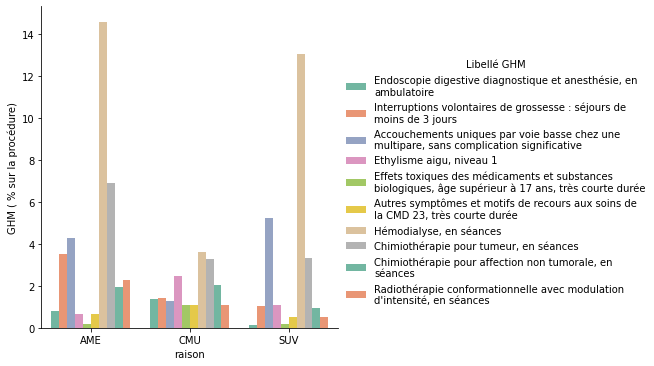

In [37]:
sns.catplot(data=df_raison_ghm[df_raison_ghm['ghm2'].isin(top_10_ghm)],
           kind='bar',
           x='raison',
           y="GHM ( % sur la procédure)",
           hue='Libellé GHM',
           palette='Set2'
           )

### Top 10 GHM selon procédure

In [318]:
top_10_ghm_suv = list(df[df['raison']=='SUV']['ghm2'].value_counts().index[:10])
top_10_ghm_ame = list(df[df['raison']=='AME']['ghm2'].value_counts().index[:10])
top_10_ghm_cmu = list(df[df['raison']=='CMU']['ghm2'].value_counts().index[:10])
top_10_ghm_autre = list(df[df['raison']=='Autre']['ghm2'].value_counts().index[:10])

In [336]:
def plot_top_ghm(df,raison,top_data):
    sns.catplot(data=df[(df['ghm2'].isin(top_data)) & (df['raison']==raison)],
           kind='bar',
           x='raison',
           y="GHM ( % sur la procédure)",
           hue='Libellé GHM',
           palette='Paired'
           )
    

##### SUV

![title](repart_ghm_patients_suv.png)

##### AME

![title](repart_ghm_patients_ame.png)

##### CMU

![title](repart_ghm_patients_cmu.png)

### Analyse temporelle

In [135]:
df_p =  df.groupby(['raison','ghm2']).agg({'anonyme':'nunique'})
df_p = df_p.reset_index()
df_p = pd.merge(df_p,enc_mco[['GHM V2020','Libellé GHM']],how='left',left_on='ghm2',right_on='GHM V2020')

In [136]:
df_patient =  df.groupby(['annee','raison','ghm2']).agg({'anonyme':'nunique'})
df_patient = df_patient.reset_index()
df_patient = pd.merge(df_patient,enc_mco[['GHM V2020','Libellé GHM']],how='left',left_on='ghm2',right_on='GHM V2020')

In [143]:
df_p[df_p['raison']=='SUV'].sort_values(by='anonyme',ascending=False)[:10]['Libellé GHM']

6546    Accouchements uniques par voie basse chez une\...
6541    Accouchements uniques par voie basse chez une\...
6512    Césariennes pour grossesse unique, sans\ncompl...
6523    Affections de l'ante partum sans intervention\...
6105    Autres interventions sur la peau, les tissus\n...
6547    Accouchements uniques par voie basse chez une\...
6532    Interruptions volontaires de grossesse : séjou...
6553    Faux travail et menaces d'accouchements prémat...
6807                             Ethylisme aigu, niveau 1
6956               Chimiothérapie pour tumeur, en séances
Name: Libellé GHM, dtype: object

In [146]:
top_10_ghm_ame = list(df_p[df_p['raison']=='AME'].sort_values(by='anonyme',ascending=False)[:10]['Libellé GHM'])
top_10_ghm_cmu = list(df_p[df_p['raison']=='CMU'].sort_values(by='anonyme',ascending=False)[:10]['Libellé GHM'])
top_10_ghm_suv = list(df_p[df_p['raison']=='SUV'].sort_values(by='anonyme',ascending=False)[:10]['Libellé GHM'])

### Top 10 GHM  par nombre de patients selon procédure

In [112]:
def plot_top_ghm(df,raison,top_data):
    return sns.catplot(data=df[(df['ghm2'].isin(top_data)) & (df['raison']==raison)],
           kind='bar',
           x='raison',
           y="GHM ( % sur la procédure)",
           hue='Libellé GHM',
           palette='Paired'
           )
    

##### SUV

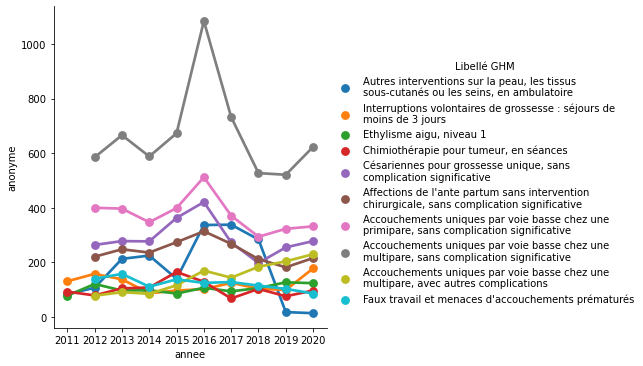

In [148]:
g= sns.catplot(data=df_patient[(df_patient['Libellé GHM'].isin(top_10_ghm_suv)) & (df_patient['raison'] == 'SUV')],
           kind='point',
           x='annee',
           y="anonyme",
           hue='Libellé GHM',
           palette='tab10',      
           )


##### AME

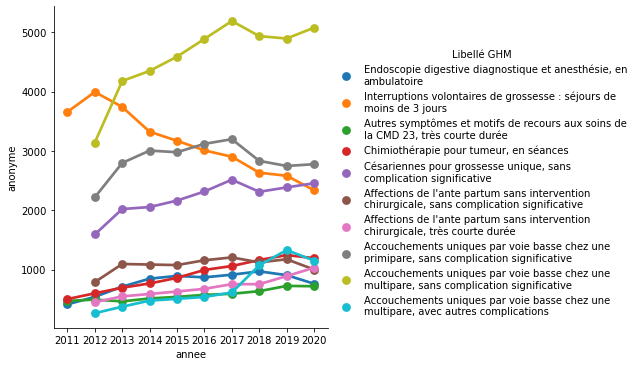

In [149]:
g= sns.catplot(data=df_patient[(df_patient['Libellé GHM'].isin(top_10_ghm_ame)) & (df_patient['raison'] == 'AME')],
           kind='point',
           x='annee',
           y="anonyme",
           hue='Libellé GHM',
           palette='tab10',      
           )

##### CMU

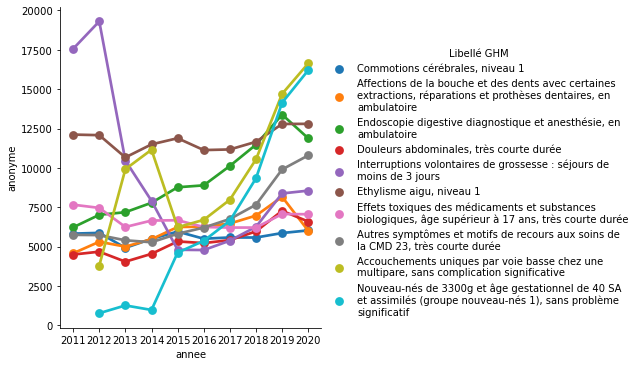

In [150]:
g= sns.catplot(data=df_patient[(df_patient['Libellé GHM'].isin(top_10_ghm_cmu)) & (df_patient['raison'] == 'CMU')],
           kind='point',
           x='annee',
           y="anonyme",
           hue='Libellé GHM',
           palette='tab10',      
           )
    

### Cout

![title](evo_cm_nombre_patients_dispositif.png)

![title](cost_cm_ghm_patient.png)

![title](cost_cm_ghm_patient_cmu.png)

![title](cost_cm_ghm_patient_ame.png)

![title](cost_cm_ghm_patient_suv.png)

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


<Figure size 1440x1440 with 0 Axes>

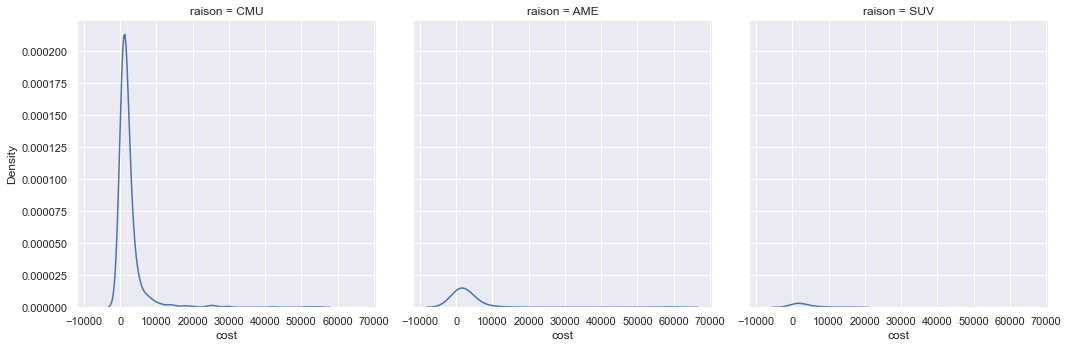

In [307]:
plt.figure(figsize=(20,20))
sns.displot(data=df.sample(1000),x='cost',kind='kde',col='raison')

<AxesSubplot:xlabel='cost', ylabel='raison'>

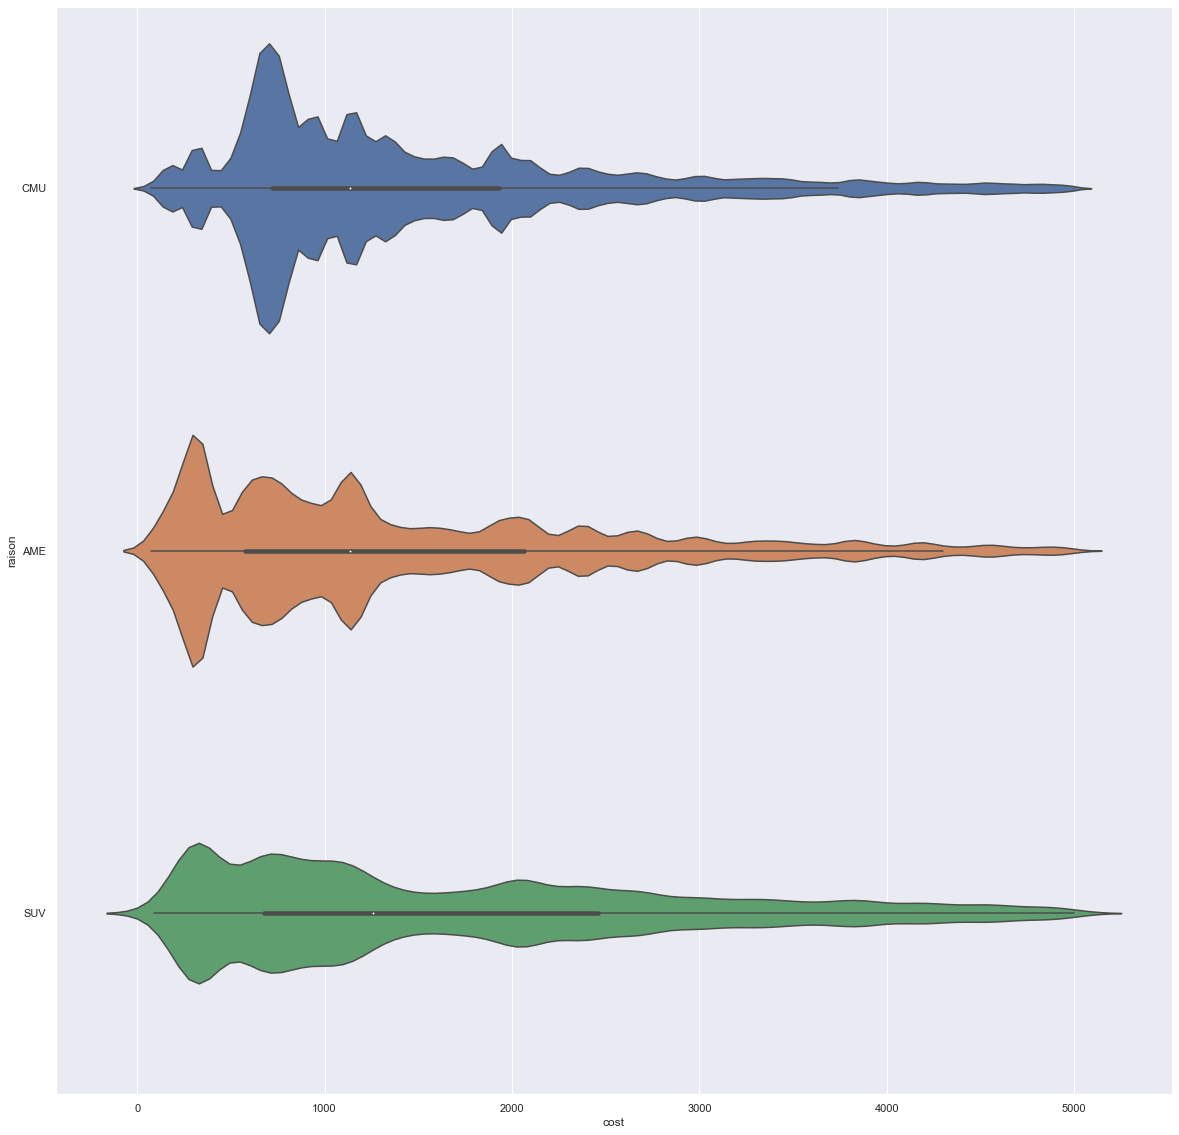

In [317]:
plt.figure(figsize=(20,20))
sns.violinplot(y="raison", x="cost",data=df[df['cost']<5000])

### Nombre de séjours des patients

![title](evo_nombre_sejour_dispositf.png)

### Sévérité

![title](repart_severite_dispositif.png)

![title](repart_severite_dispositif_sup.png)

### Type d'hospitalisation

![title](repart_type_hp_dispositif.png)